There is an undirected tree with n nodes labeled from 0 to n - 1. You are given the integer n and a 2D integer array edges of length n - 1, where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the tree.

You are also given a 0-indexed integer array values of length n, where values[i] is the value associated with the ith node, and an integer k.

A valid split of the tree is obtained by removing any set of edges, possibly empty, from the tree such that the resulting components all have values that are divisible by k, where the value of a connected component is the sum of the values of its nodes.

Return the maximum number of components in any valid split.

 

Example 1:

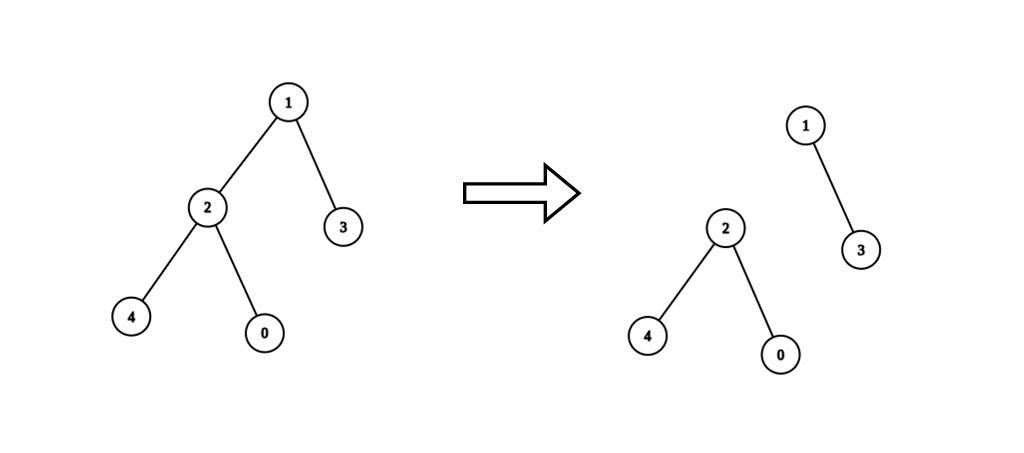

Input: n = 5, edges = [[0,2],[1,2],[1,3],[2,4]], values = [1,8,1,4,4], k = 6
Output: 2
Explanation: We remove the edge connecting node 1 with 2. The resulting split is valid because:
- The value of the component containing nodes 1 and 3 is values[1] + values[3] = 12.
- The value of the component containing nodes 0, 2, and 4 is values[0] + values[2] + values[4] = 6.
It can be shown that no other valid split has more than 2 connected components.

Example 2:

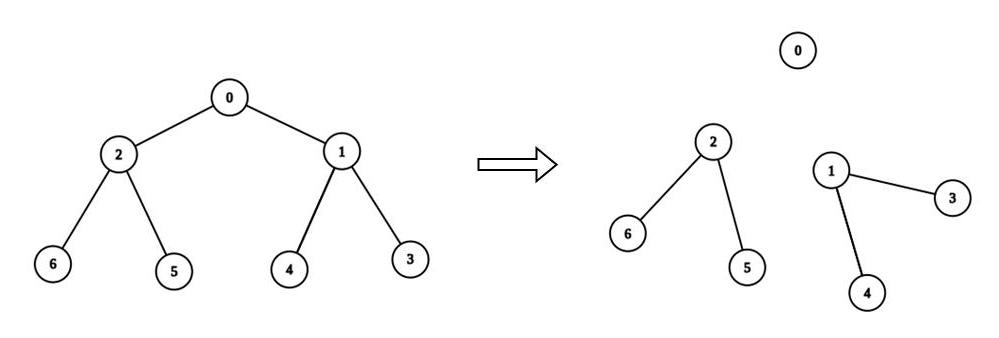

Input: n = 7, edges = [[0,1],[0,2],[1,3],[1,4],[2,5],[2,6]], values = [3,0,6,1,5,2,1], k = 3
Output: 3
Explanation: We remove the edge connecting node 0 with 2, and the edge connecting node 0 with 1. The resulting split is valid because:
- The value of the component containing node 0 is values[0] = 3.
- The value of the component containing nodes 2, 5, and 6 is values[2] + values[5] + values[6] = 9.
- The value of the component containing nodes 1, 3, and 4 is values[1] + values[3] + values[4] = 6.
It can be shown that no other valid split has more than 3 connected components.

 

Constraints:

    1 <= n <= 3 * 104
    edges.length == n - 1
    edges[i].length == 2
    0 <= ai, bi < n
    values.length == n
    0 <= values[i] <= 109
    1 <= k <= 109
    Sum of values is divisible by k.
    The input is generated such that edges represents a valid tree.



In [ ]:
class Solution:
    def maxKDivisibleComponents(self, n: int, edges: List[List[int]], values: List[int], k: int) -> int:
        adj_list = [[] for _ in range(n)]
        for node1, node2 in edges:
            adj_list[node1].append(node2)
            adj_list[node2].append(node1)

        component_count = [0]  # Use a list to pass by reference
        self.dfs(0, -1, adj_list, values, k, component_count)
        return component_count[0]

    def dfs(
        self,
        current_node: int,
        parent_node: int,
        adj_list: List[List[int]],
        node_values: List[int],
        k: int,
        component_count: List[int],
    ) -> int:
        # Step 1: Initialize sum for the current subtree
        sum_ = 0b

        # Step 2: Traverse all neighbors
        for neighbor_node in adj_list[current_node]:
            if neighbor_node != parent_node:
                # Recursive call to process the subtree rooted at the neighbor
                sum_ += self.dfs(
                    neighbor_node,
                    current_node,
                    adj_list,
                    node_values,
                    k,
                    component_count,
                )
                sum_ %= k  # Ensure the sum stays within bounds

        # Step 3: Add the value of the current node to the sum
        sum_ += node_values[current_node]
        sum_ %= k

        # Step 4: Check if the sum is divisible by k
        if sum_ == 0:
            component_count[0] += 1

        # Step 5: Return the computed sum for the current subtree
        return sum_

In [ ]:
class Solution:
    def maxKDivisibleComponents(
        self, n: int, edges: List[List[int]], values: List[int], k: int
    ) -> int:
        # Base case: if there are less than 2 nodes, return 1
        if n < 2:
            return 1

        component_count = 0
        graph = defaultdict(set)

        # Step 1: Build the graph
        for node1, node2 in edges:
            graph[node1].add(node2)
            graph[node2].add(node1)

        # Step 2: Initialize the BFS queue with leaf nodes (nodes with only one connection)
        queue = deque(
            node for node, neighbors in graph.items() if len(neighbors) == 1
        )

        # Step 3: Process nodes in BFS order
        while queue:
            current_node = queue.popleft()
            neighbor_node = (
                next(iter(graph[current_node])) if graph[current_node] else -1
            )

            # Remove the edge between current and neighbor
            if neighbor_node >= 0:
                graph[neighbor_node].remove(current_node)

            # Check divisibility of the current node's value
            if values[current_node] % k == 0:
                component_count += 1
            else:
                values[neighbor_node] += values[current_node]

            # If the neighbor becomes a leaf node, add it to the queue
            if neighbor_node >= 0 and len(graph[neighbor_node]) == 1:
                queue.append(neighbor_node)

        return component_count